In [2]:
import pandas as pd
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                      header=None)

In [4]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('고윳값 %s' % eigen_vals)

고윳값 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [9]:
X_train_std.shape

(124, 13)

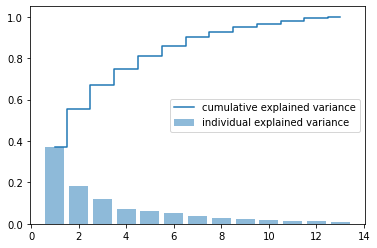

In [13]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
          label='cumulative explained variance')
plt.legend(loc='best')



In [15]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [16]:
eigen_pairs

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203513,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977367,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578422,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114,

In [18]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
           eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [20]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [21]:
X_train_pca = X_train_std.dot(w)

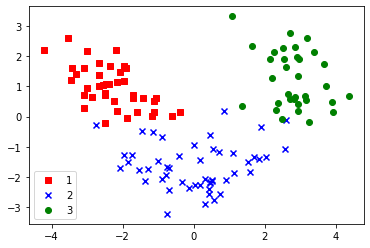

In [23]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c , m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=l, marker=m)
plt.legend(loc='lower left')

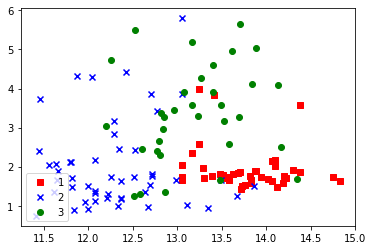

In [25]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c , m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train[y_train==l, 0],
              X_train[y_train==l, 1],
              c=c, label=l, marker=m)
plt.legend(loc='lower left')

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  makers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.6,
                c=cmap.colors[idx],
                edgecolor='black',
                marker=markers[idx],
                label=cl)

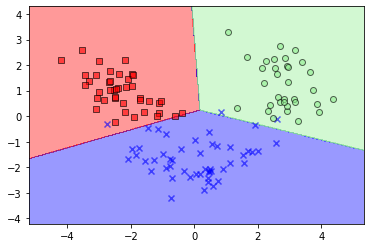

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)

In [32]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(
      X_train_std[y_train==label], axis=0))
  print('%s: %s\n' % (label, mean_vecs[label-1]))

1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [49]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row -mv).T)
  S_W += class_scatter

print('클래스 내의 산포 행렬: {}x{}'.format(S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [50]:
X_train_std.shape

(124, 13)

In [60]:
mean_vecs

[array([ 0.9066, -0.3497,  0.3201, -0.7189,  0.5056,  0.8807,  0.9589,
        -0.5516,  0.5416,  0.2338,  0.5897,  0.6563,  1.2075]),
 array([-0.8749, -0.2848, -0.3735,  0.3157, -0.3848, -0.0433,  0.0635,
        -0.0946,  0.0703, -0.8286,  0.3144,  0.3608, -0.7253]),
 array([ 0.1992,  0.866 ,  0.1682,  0.4148, -0.0451, -1.0286, -1.2876,
         0.8287, -0.7795,  0.9649, -1.209 , -1.3622, -0.4013])]

In [62]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T, bias=True)
  S_W += class_scatter

In [64]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot(
      (mean_vec - mean_overall).T)

In [65]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [74]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, 
                     key=lambda k: k[0], reverse=True)

In [77]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

In [78]:
w.shape

(13, 2)

In [79]:
X_train_lba = X_train_std.dot(w)

In [80]:
X_train_lba.shape

(124, 2)

In [82]:
X_train_std.shape

(124, 13)

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [84]:
X_train_lda.shape

(124, 2)

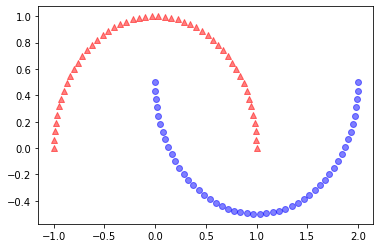

In [89]:
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
              color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
              color='blue', marker='o', alpha=0.5)

[]

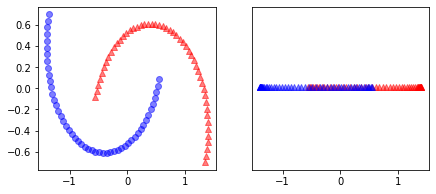

In [91]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))+0.02,
              color='blue', marker='^', alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])

In [ ]:
np.zeros((50,1))+0.02

In [95]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  sq_dists = pdist(X, 'sqeuclidean')
  mat_sq_dists = squareform(sq_dists)
  K = exp(-gamma * mat_sq_dists)
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
  X_pc = np.column_stack([eigvecs[:, i]
                          for i in range(n_components)])
  return X_pc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':


[]

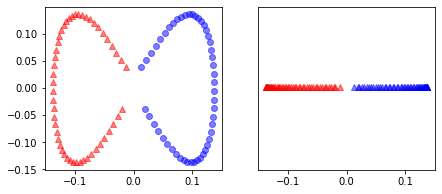

In [98]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))+0.02,
              color='blue', marker='^', alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])

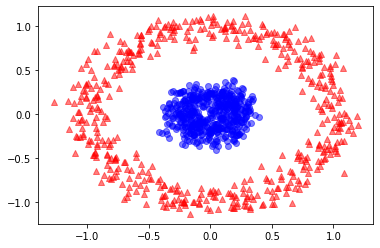

In [101]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)

[]

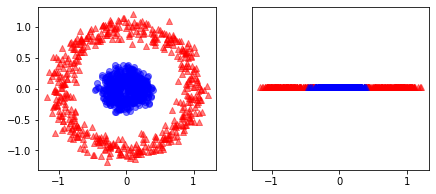

In [103]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))+0.02,
              color='blue', marker='^', alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':


[]

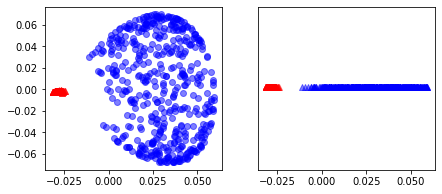

In [104]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))+0.02,
              color='blue', marker='^', alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])